In [1]:
!pip install supervision
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 43.0 MB/s eta 0:00:00


In [2]:
import supervision
import ultralytics
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
model=ultralytics.YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 293MB/s]


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%%writefile /content/config.yaml

 path: /content/drive/MyDrive/dataset-20241203T042829Z-001/dataset
 train: /content/drive/MyDrive/dataset-20241203T042829Z-001/dataset/images/train
 val: /content/drive/MyDrive/dataset-20241203T042829Z-001/dataset/images/val
 nc: 1

 names: [
     'license_plate'
 ]

Writing /content/config.yaml


In [9]:
!yolo task=detect mode=train model="/content/new_best_2nd_dec.pt" data="/content/config.yaml" epochs=200

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/new_best_2nd_dec.pt, data=/content/config.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

In [10]:
!yolo task=detect mode=val model="/content/runs/detect/train3/weights/best.pt" data="/content/config.yaml"

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/dataset-20241203T042829Z-001/dataset/labels/val.cache... 95 images, 0 backgrounds, 0 corrupt: 100% 95/95 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:03<00:00,  1.76it/s]
                   all         95         95      0.978      0.979      0.982      0.848
Speed: 4.0ms preprocess, 12.1ms inference, 0.0ms loss, 8.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [11]:
#get bounding box predictions
from ultralytics import YOLO

path="/content/image_1.jpg"

yolo_model=YOLO("/content/runs/detect/train3/weights/best.pt")
bbox_results=yolo_model.predict(path,verbose=False)

In [12]:
all_box_list = []
all_conf_list = []


for bbox_result in bbox_results:
    boxes = bbox_result.boxes
    box_list = []
    conf_list = []
    for box in boxes:
        box_data = box.data[0][:4]
        box_data = [int(x) for x in box_data]
        conf = round(float(box.conf), 2)
        if(conf>=0.5):
            box_list.append(box_data)
            conf_list.append(conf)

    all_box_list.append(box_list)
    all_conf_list.append(conf_list)

In [13]:
all_conf_list

[[0.91]]

In [14]:
# for i in bbox_results:
#   print(i.boxes)

print(all_box_list[0])
print(all_conf_list)


# for i, box in enumerate(boxes):
#   print(i, box)

[[94, 211, 186, 235]]
[[0.91]]


In [15]:
ori_path = path
print(ori_path)
ori_image = cv2.imread(ori_path)
ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)

/content/image_1.jpg


In [16]:
from ultralytics.utils.plotting import Annotator


annotator = Annotator(ori_image)
boxes = all_box_list
confs = all_conf_list

In [17]:
for i in all_box_list[0]:
  print(i)

[94, 211, 186, 235]


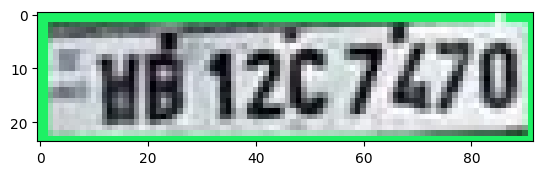

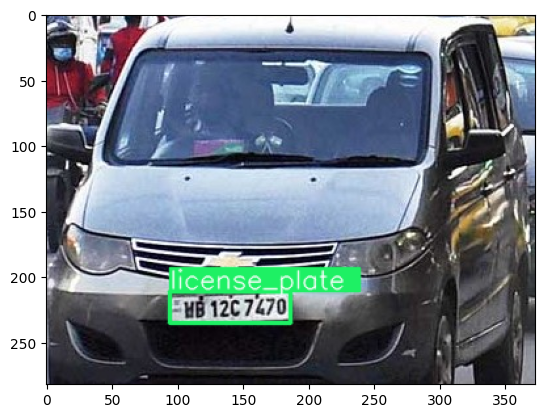

In [18]:
import matplotlib.pyplot as plt

# for i, box in enumerate(boxes):
#   print(i)
box = all_box_list[0][0]
confs = 0.120
annotator.box_label(box=box, label="license_plate ", color=(30, 240, 100))

# Get Plate Object
x1, y1, x2, y2 = box
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
roi = ori_image[y1:y2, x1:x2]
plt.imshow(roi)
plt.show()

# Show Image
frame = annotator.result()
plt.imshow(frame)
plt.show()